# Apresentação ✒️

Notebook destinado ao estudo do uso de modelos de IA para realizar aplicações. Os modelos de IA utilizados serão instalados e importados, os quais estão armazenados no HuggingFace Hub, repositório de datasets e modelos de Machine Learning. Dentre as aplicações criadas no primeiro momento estarão : a elaboração de um analista de sentimento, um chatbot e uma aplicação que retira o fundo de uma imagem.

## Bibliotecas 📚

In [1]:
!pip install pysentimiento -q

In [34]:
import nltk
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from pysentimiento import create_analyzer

## Instanciando o modelo 🤖

In [3]:
analyzer = create_analyzer(task="sentiment", lang="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
# Testando o modelo importado. Como eu pretendo elaborar um modelo no futuro
# relacionado ao universo da psicologia, em especial para pessoas que apresentam
# depressão e ideações/impulsos autodestrutivos, testarei o modelo com a frase
# abaixo, para analisar se ele identifica o sentimento latente a ela.

sentimento_analisado = analyzer.predict('''Eu me sinto invisível. Todos se afastam de mim e me rejeitam.
                                           Tenho vontade partir.
                                        ''')

In [5]:
# Parece que o modelo está funcionando.

sentimento_analisado

AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.035, POS: 0.005})

## Importando o dataset que será utilizado para fins de estudo 💾

In [8]:
# Carregando o dataset e o transformando num pandas dataframe.

file_path = '/content/resenhas.csv'

df = pd.read_csv(file_path)

In [9]:
# Visualizando as 5 primeiras linhas do dataframe.

df.head(5)

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...


In [10]:
# Fazendo o modelo realizar uma predição para cada
# resenha presente no dataframe.

sentimentos_lista = analyzer.predict(df['Resenha'])

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [21]:
sentimentos_lista[:5]

[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003})]

In [17]:
# Iterando sobre os sentimentos a fim de extrair apenas o sentimento
# que, segundo o modelo, é o mais prevalente em cada resenha. Apesar de
# haver mais informações importantes, para fins de criação de um dataframe
# faz mais sentido haver apenas o sentimento prevalente.

sentimento_lista = []

for sentimento in sentimentos_lista:
  sentimento_lista.append(sentimento.output)


In [19]:
# Criando uma nova coluna com os sentimentos prevalentes.

df['Sentimento'] = sentimento_lista

In [20]:
df

,ID,Resenha,Sentimento
0,24,"A fritadeira é sensacional, muito além do que ...",POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS
2,865,"Muito funcional, prática e moderna.",POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...,POS
5,657,"Usei ela algumas vezes já, muito silenciosa, l...",POS
6,182,"Superou minhas expectativas, por enquanto tudo...",POS
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo...",POS
8,343,"Estou muito satisfeito com a negociação, receb...",POS
9,624,Lindaaaa amei super indico,POS


### Visualizando os sentimentos mais prevalentes no dataset.

In [23]:
# Criando um novo dataframe para facilitar a visualização dos sentimentos
# prevalentes, segundo ao total de resenhas presentes.

df_sentimento = df.groupby('Sentimento').size().reset_index(name='Contagem')

fig = px.bar(df_sentimento, x='Sentimento', y='Contagem',
             title='Contagem de resenhas por sentimento.')

fig.show()

Observando o gráfico, parece que há mais resenhas negativas do que positivas e neutras, sendo essa última a minoritária. Pensando em termos de negócio, seria interessante analisar quais são as palavras majoritárias de cada sentimento, em especial, dos sentimentos majoritários, com o objetivo de saber quais são os principais termos que implicam numa resenha negativa ao cliente e, por outro lado, os que implicam numa resenha positiva.

Para isso, uma das abordagens a serem utilizadas pode ser o recurso da nuvem de palavras. Trata-se de um recurso visual que evidencia quais são as palavras mais prevalentes, facilitando a análise do que está sendo mais comentado.

### Analisando os termos mais prevalentes

In [29]:
'''
Para analisar os termos mais prevalentes, para otmizar esse processo,
irei realizar o processo de remoção das stopwords, que se referem a termos
que não oferecem um teor semântico significativo para a presente análise,
as quais são : artigos, preposições, conjunções, etc.
'''

# Carregando as stopwords em português.

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
# Visualizando algumas stop_words :

stop_words_list = []

for stop_word in stop_words:
  stop_words_list.append(stop_word)

stop_words_list[:5]

['entre', 'foi', 'no', 'só', 'me']

In [35]:
# Criando a nuvem de palavras.

def nuvem_de_palavras(texto : str, coluna_texto : str, sentimento : str):

   # Filtrando as resenhas com base no sentimento especificado
    texto_sentimento = texto.query(f"Sentimento == '{sentimento}'")[coluna_texto]

    # Unindo todas as resenhas em uma única string
    texto_unido = " ".join(texto_sentimento)

    # Dividindo o texto em palavras e filtrando com stopwords
    palavras = texto_unido.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words]
    texto_filtrado = " ".join(palavras_filtradas)

    # Criando e exibindo a nuvem de palavras
    nuvem_palavras = WordCloud(width=800, height=500, max_words=50).generate(texto_filtrado)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

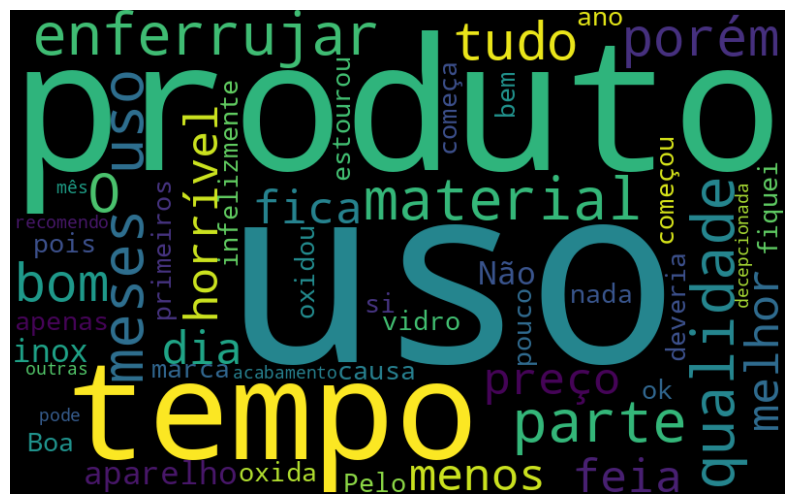

In [37]:
# Visualizando a nuvem de palavras para cada sentimento majoritário.

# Sentimento negativo.
nuvem_de_palavras(df, 'Resenha', 'NEG')

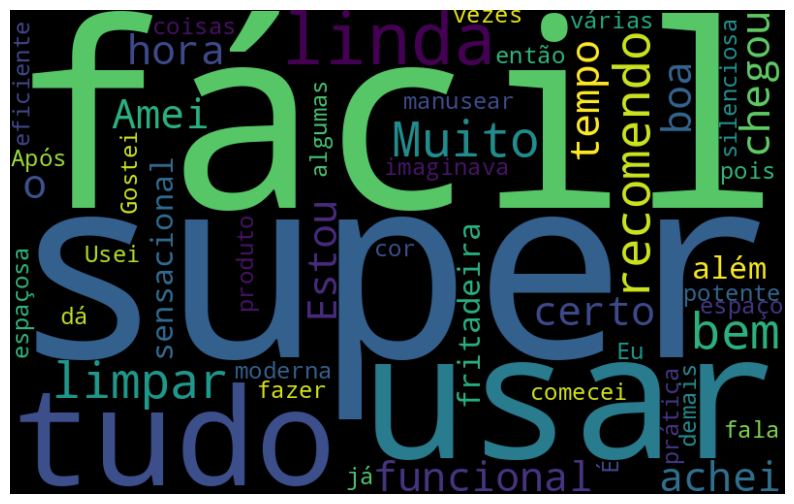

In [38]:
# Sentimento positivo.
nuvem_de_palavras(df, 'Resenha', 'POS')